# 0. Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = train.append(test,sort=False)

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


# 2. Clean the Data

## 2.1 Deals with Null Values

In [9]:
features = []
nullValues = []
for i in data:
    if(data.isna().sum()[i]>1000 and i!='SalePrice'):
        features.append(i)
        nullValues.append(data.isna().sum()[i])

In [11]:
features

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
nullValues

[2721, 1420, 2909, 2348, 2814]

In [13]:
y_pos = np.arange(len(features))

In [14]:
y_pos

array([0, 1, 2, 3, 4])

## Vistualization of Nul Values Data

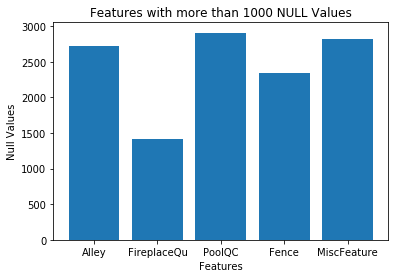

In [28]:
plt.bar(y_pos,nullValues,align='center',alpha=1)
plt.xticks(y_pos,features)
plt.ylabel('Null Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL Values')
plt.show()

In [29]:
data = data.dropna(axis=1,how='any',thresh=1000)
data = data.fillna(data.mean())

In [30]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000.0
7,8,60,RL,69.305795,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000.0


## 2.2 Deals with String Values 

In [60]:
data = pd.get_dummies(data)

## 2.3 Deals with Correlations

### Drop Features that Correlate with each other

In [32]:
covarianceMatrix = data.corr()

In [33]:
covarianceMatrix.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.016945,...,-0.017583,0.022635,-0.002452,-0.021622,-0.008450,0.034629,-0.007055,0.014494,-0.019504,0.022167
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,...,0.001218,-0.040736,-0.018118,0.039911,0.003719,0.011253,0.037366,-0.023187,0.027341,-0.045302
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203603,...,-0.041038,0.114645,-0.003890,-0.084007,0.002206,-0.046903,0.007403,0.015590,-0.082070,0.112441
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,...,-0.015732,0.031601,-0.004067,-0.014035,-0.014771,-0.020429,0.024241,0.017927,-0.022898,0.033434
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,...,-0.045148,0.338330,-0.052783,-0.194091,-0.127006,-0.049636,-0.040738,-0.023605,-0.134282,0.333192


In [42]:
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set()
for i in range(len(listOfFeatures)):
    for j in range(i+1,len(listOfFeatures)):
        feature1 = listOfFeatures[i]
        feature2 = listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2])>0.8:
            setOfDroppedFeatures.add(feature1)
data.drop(setOfDroppedFeatures,axis=1)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Drop features that are not correlated with output

In [46]:
nonCorrelatedWithoutput = [column for column in data if abs(data[column].corr(data['SalePrice'])) < 0.045]
data = data.drop(nonCorrelatedWithoutput, axis=1)

In [47]:
nonCorrelatedWithoutput

['Id',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR3',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_ClearCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SawyerW',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',


## 2.4 Deals with Outlier

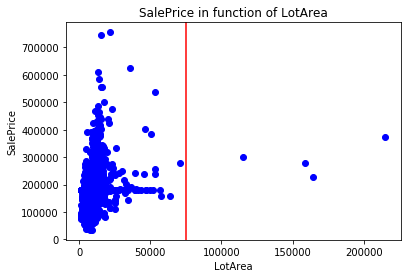

In [49]:
zplt.plot(data['LotArea'], data['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

## Seperate the Data to remove Outlier

In [50]:
newTrain = data.iloc[:1460]

In [52]:
newTest = data.iloc[1460:]

In [55]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = newTrain.drop(outlierValuesList) #Drop outlier rows
    
trainWithoutOutliers = newTrain

# 3. Train the Data

In [57]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

# 4. Make & Submit prediction

## 4.1 Make Prediction

In [58]:
newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column
pred = np.expm1(reg.predict(newTest))

### 4.2 Submit Prediction

In [59]:
sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,114229.478240
1,1462,149906.500087
2,1463,175128.744791
3,1464,194928.500753
4,1465,206380.597397
...,...,...
1454,2915,80307.361233
1455,2916,82936.854913
1456,2917,160604.666045
1457,2918,115425.461366
